In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [2]:
data = pd.read_csv('nbaallelo.csv')
data['date_game'] = pd.to_datetime(data.date_game,infer_datetime_format=True)
data

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


C:\Users\tybuc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


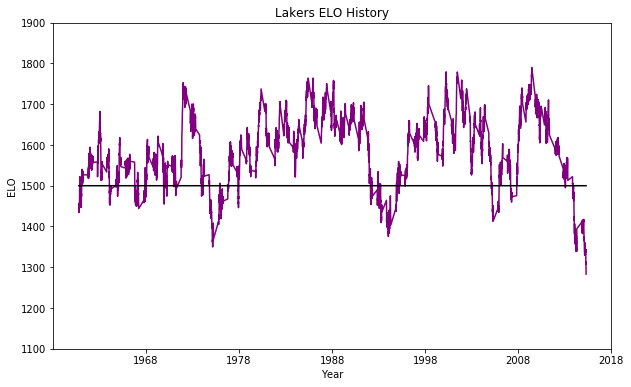

In [3]:
plt.figure(figsize=(10,6))
lal = data.loc[data.team_id=='LAL']
plt.plot(lal.date_game,lal.elo_n,c='purple')
plt.plot(lal.date_game,[1500 for i in range(len(lal.index))],c='black')
plt.ylabel('ELO')
plt.xlabel('Year')
plt.ylim(1100,1900)
plt.title("Lakers ELO History")
plt.show()

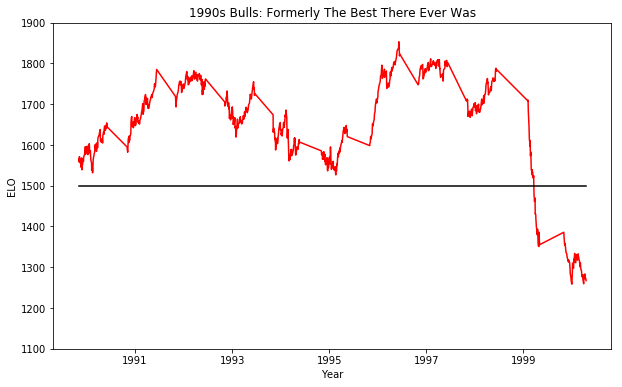

In [4]:
plt.figure(figsize=(10,6))
bulls = data.loc[data.team_id=='CHI']
bulls = bulls.loc[(bulls.year_id>=1990)&(bulls.year_id<=2000)]
plt.plot(bulls.date_game,bulls.elo_n,c='red')
plt.plot(bulls.date_game,[1500 for i in range(len(bulls.index))],c='black')
plt.ylabel('ELO')
plt.xlabel('Year')
plt.ylim(1100,1900)
plt.title("1990s Bulls: Formerly The Best There Ever Was")
plt.show()

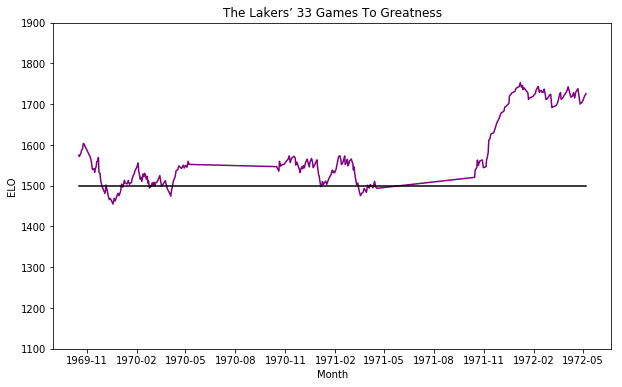

In [5]:
plt.figure(figsize=(10,6))
lal = lal.loc[(lal.year_id>=1970)&(lal.year_id<=1972)]
plt.plot(lal.date_game,lal.elo_n,c='purple')
plt.plot(lal.date_game,[1500 for i in range(len(lal.index))],c='black')
plt.ylabel('ELO')
plt.xlabel('Month')
plt.ylim(1100,1900)
plt.title("The Lakers’ 33 Games To Greatness")
plt.show()

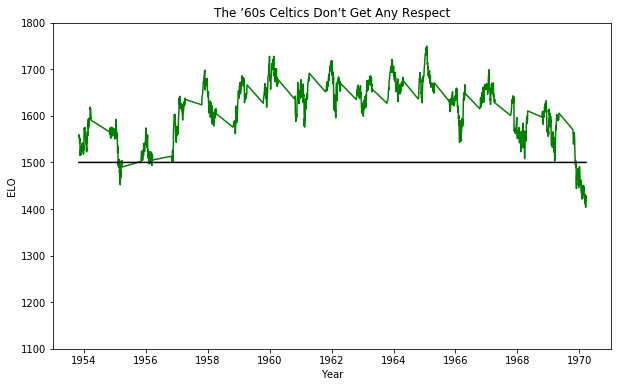

In [6]:
plt.figure(figsize=(10,6))
bos = data.loc[data.team_id=='BOS']
bos = bos.loc[(bos.year_id>=1954)&(bos.year_id<=1970)]
plt.plot(bos.date_game,bos.elo_n,c='green')
plt.plot(bos.date_game,[1500 for i in range(len(bos.index))],c='black')
plt.ylabel('ELO')
plt.xlabel('Year')
plt.ylim(1100,1800)
plt.title("The ’60s Celtics Don’t Get Any Respect")
plt.show()

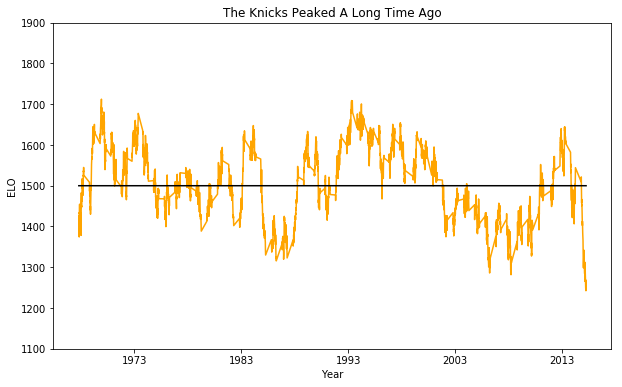

In [7]:
plt.figure(figsize=(10,6))
nyk = data.loc[data.team_id=='NYK']
nyk = nyk.loc[(nyk.year_id>=1968)]
plt.plot(nyk.date_game,nyk.elo_n,c='orange')
plt.plot(nyk.date_game,[1500 for i in range(len(nyk.index))],c='black')
plt.ylabel('ELO')
plt.xlabel('Year')
plt.ylim(1100,1900)
plt.title("The Knicks Peaked A Long Time Ago")
plt.show()

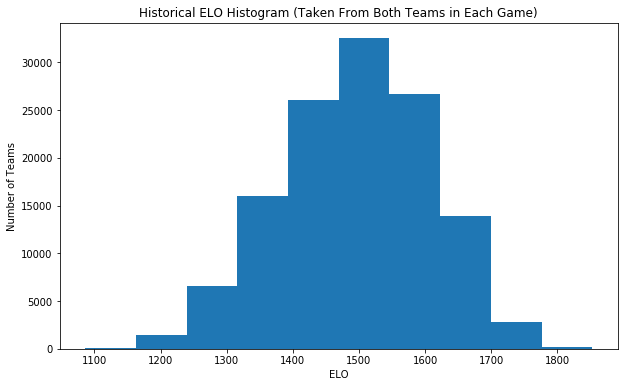

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data.elo_n)
plt.xlabel('ELO')
plt.ylabel("Number of Teams")
plt.title("Historical ELO Histogram (Taken From Both Teams in Each Game)")
plt.show()

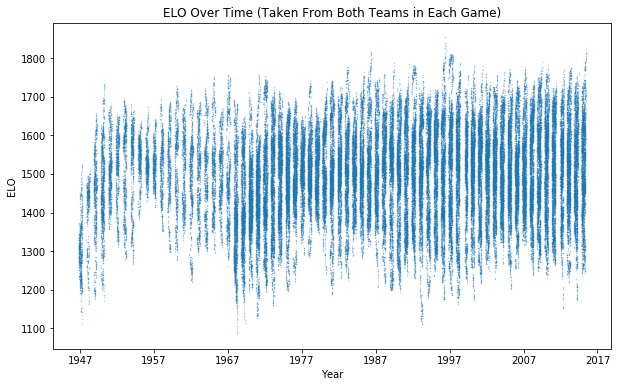

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data.date_game,data.elo_n,s=.1,alpha=.5)
plt.xlabel('Year')
plt.ylabel("ELO")
plt.title("ELO Over Time (Taken From Both Teams in Each Game)")
plt.show()

In [10]:
data.loc[data.game_location=='H'].game_result.value_counts()

W    39305
L    23833
Name: game_result, dtype: int64

In [11]:
len(data.game_id.unique())

63157

In [12]:
data = data.loc[((data.gameorder%2==0) & (data.game_location=='H')) | ((data.gameorder%2==1) & (data.game_location=='A'))]
data['home_game'] = (data.game_location == 'H').astype(int)
data['win'] = (data.game_result == 'W').astype(int)
data

C:\Users\tybuc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tybuc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,home_game,win
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN,0,1
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN,1,1
5,3,194611020DTF,NBA,1,1947,1946-11-02,1,0,WSC,Capitols,...,Falcons,33,1300.0000,1279.6189,A,W,0.359935,NaN,0,1
7,4,194611020PRO,NBA,0,1947,1946-11-02,1,0,PRO,Steamrollers,...,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN,1,1
8,5,194611020STB,NBA,1,1947,1946-11-02,1,0,PIT,Ironmen,...,Bombers,56,1300.0000,1304.6908,A,L,0.359935,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126304,63153,201506070GSW,NBA,1,2015,2015-06-07,98,1,CLE,Cavaliers,...,Warriors,93,1806.2035,1797.5032,A,W,0.242326,NaN,0,1
126307,63154,201506090CLE,NBA,0,2015,2015-06-09,99,1,CLE,Cavaliers,...,Warriors,91,1797.5032,1790.9591,H,W,0.527843,NaN,1,1
126308,63155,201506110CLE,NBA,1,2015,2015-06-11,101,1,GSW,Warriors,...,Cavaliers,82,1723.4149,1704.3949,A,W,0.453428,NaN,0,1
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,...,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN,1,1


In [13]:
data.game_result.value_counts()

W    31766
L    31372
Name: game_result, dtype: int64

In [14]:
X = data[['seasongame','is_playoffs','elo_i','opp_elo_i','home_game','forecast']]
y = data.win
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .25)

In [15]:
silver_prediction = (X_test.forecast>=0.5).astype(int)
silver_prediction

42929     0
36442     1
107728    0
111002    1
123980    0
         ..
21307     1
100251    0
34078     1
10369     0
107321    0
Name: forecast, Length: 15785, dtype: int32

In [16]:
silver_test_acc = sum(silver_prediction==y_test)/len(silver_prediction==y_test)
silver_test_acc

0.6795058599936649

In [17]:
X_trainOLS = X_train.drop(columns=['forecast','seasongame','is_playoffs'])
X_testOLS = X_test.drop(columns=['forecast','seasongame','is_playoffs'])

In [18]:
model = sm.OLS(y_train,X_trainOLS)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                          2.301e+04
Date:                Fri, 23 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:56:40   Log-Likelihood:                         -29646.
No. Observations:               47353   AIC:                                  5.930e+04
Df Residuals:                   47350   BIC:                                  5.932e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
elo_i          0.0013   1.39e-05     93.514      0.000       0.001       0.001
opp_elo_i     -0.0011    1.4e-05    -75.312      0.000      -0.001      -0.001
home_game      0.2483      0.004     59.768      0.000       0.240       0.256
==============================================================================
Omnibus:                   283475.222   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3403.575
Skew:                          -0.014   Prob(JB):                         0.00
Kurtosis:                       1.687   Cond. No.                     4.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
OLS_prediction = (result.predict(X_testOLS)>=0.5).astype(int)
OLS_test_acc = sum(OLS_prediction==y_test)/len(OLS_prediction==y_test)
OLS_test_acc

0.6800126702565727

In [20]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_trainPoly = poly.fit_transform(X_trainOLS)
X_testPoly = poly.fit_transform(X_testOLS)

In [21]:
model = sm.OLS(y_train,X_trainPoly)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.594
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                          1.156e+04
Date:                Fri, 23 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:56:41   Log-Likelihood:                         -29579.
No. Observations:               47353   AIC:                                  5.917e+04
Df Residuals:                   47347   BIC:                                  5.922e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015   2.62e-05     55.972      0.000       0.001       0.002
x2            -0.0009   2.64e-05    -32.625      0.000      -0.001      -0.001
x3             0.0290      0.074      0.393      0.695      -0.116       0.174
x4         -2.339e-07   2.33e-08    -10.026      0.000    -2.8e-07   -1.88e-07
x5          9.995e-05   3.72e-05      2.690      0.007    2.71e-05       0.000
x6          4.516e-05   3.71e-05      1.216      0.224   -2.76e-05       0.000
==============================================================================
Omnibus:                   451811.960   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3447.841
Skew:                          -0.008   Prob(JB):                         0.00
Kurtosis:                       1.678   Cond. No.                     8.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Remove all features with P-value of greater than .03
Poly_prediction = (result.predict(X_testPoly)>=0.5).astype(int)
Poly_test_acc = sum(Poly_prediction==y_test)/len(Poly_prediction==y_test)
Poly_test_acc

0.6803927779537535

In [23]:
clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X_trainOLS,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [24]:
KNN_prediction = (clf.predict(X_testOLS)>=0.5).astype(int)
KNN_test_acc = sum(KNN_prediction==y_test)/len(KNN_prediction==y_test)
KNN_test_acc

0.6304719670573329

In [25]:
clf = RandomForestClassifier(max_depth=6,random_state=7)
clf.fit(X_trainOLS,y_train)

C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [26]:
RFC_prediction = (clf.predict(X_testOLS)>=0.5).astype(int)
RFC_test_acc = sum(RFC_prediction==y_test)/len(RFC_prediction==y_test)
RFC_test_acc

0.6806461830852075

In [27]:
len(X_train)

47353

In [28]:
len(X_test)

15785

In [29]:
silver = []
ols = []
polys = []
knn = []
rfc = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    
    silver_prediction = (X_test.forecast>=0.5).astype(int)
    silver.append(sum(silver_prediction==y_test)/len(silver_prediction==y_test))
    
    X_trainOLS = X_train.drop(columns=['forecast','seasongame','is_playoffs'])
    X_testOLS = X_test.drop(columns=['forecast','seasongame','is_playoffs'])
    
    model = sm.OLS(y_train,X_trainOLS)
    result = model.fit()
    OLS_prediction = (result.predict(X_testOLS)>=0.5).astype(int)
    ols.append(sum(OLS_prediction==y_test)/len(OLS_prediction==y_test))
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    X_trainPoly = poly.fit_transform(X_trainOLS)
    X_testPoly = poly.fit_transform(X_testOLS)
    model = sm.OLS(y_train,X_trainPoly)
    result = model.fit()
    OLS_prediction = (result.predict(X_testPoly)>=0.5).astype(int)
    polys.append(sum(OLS_prediction==y_test)/len(OLS_prediction==y_test))
    
    clf = KNeighborsClassifier(n_neighbors=25)
    clf.fit(X_trainOLS,y_train)
    KNN_prediction = (clf.predict(X_testOLS)>=0.5).astype(int)
    knn.append(sum(KNN_prediction==y_test)/len(KNN_prediction==y_test))
    
    clf = RandomForestClassifier(max_depth=6,random_state=7)
    clf.fit(X_trainOLS,y_train)
    RFC_prediction = (clf.predict(X_testOLS)>=0.5).astype(int)
    rfc.append(sum(RFC_prediction==y_test)/len(RFC_prediction==y_test))

C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tybuc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

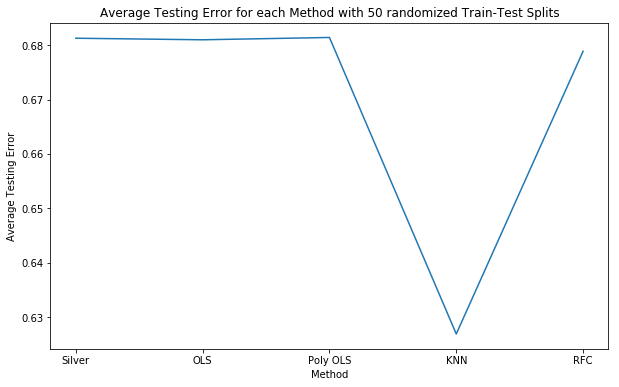

In [30]:
plt.figure(figsize=(10,6))
means = [np.mean(silver),np.mean(ols),np.mean(polys),np.mean(knn),np.mean(rfc)]
titles = ['Silver','OLS','Poly OLS', 'KNN', 'RFC']
plt.plot(titles,means)
plt.xlabel('Method')
plt.ylabel('Average Testing Error')
plt.title("Average Testing Error for each Method with 50 randomized Train-Test Splits")
plt.show()

In [31]:
print(titles)
print(means)

['Silver', 'OLS', 'Poly OLS', 'KNN', 'RFC']
[0.6812809629394995, 0.6809946151409565, 0.6814216027874564, 0.6268685460880583, 0.6788862844472601]
